# Configuração Inicial

In [43]:
import pathlib
import sys

requirements_filename = 'requirements_ap5.txt'
if str(pathlib.Path().resolve().name) == "notebooks":
    root = str(pathlib.Path().resolve().parent.parent)+'/'
    sys.path.append(root)
    requirements_path = root + 'requirements/'+requirements_filename
else:
    ! git clone --branch ap5 https://github.com/Fabio-Trindade/Eng-Aprendizado-Maquina.git
    root = str(pathlib.Path().resolve())
    src_path = root + '/Eng-Aprendizado-Maquina/'
    requirements_path = src_path + 'requirements/'+requirements_filename
    sys.path.append(root + '/Eng-Aprendizado-Maquina/')

! pip install -r $requirements_path

# Imports

In [44]:
from src.utils.util_read_file import UtilReadFile
from src.constants.KPaths import KPaths
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np

In [45]:
root = KPaths.path_root

# Análise Exploratória: *breastcancerwisconsin.csv*

In [46]:
df = UtilReadFile.read_csv_with_pandas(root + '/datasets/breastcancerwisconsin.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


Aparentemente o *dataset* contém um erro na sua formatação, visto que existe uma coluna não nomeada (*unnamed: 32*) e contém apenas dados nulos. Abaixo será analisado a possibilidade de exclusão da mesma.

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

A partir das informações acima é possível perceber que a coluna *unnamed 32* contém apenas dados nulos, ao contrário das demais colunas.

## Retirando colunas *Unnamed: 32* e *id*
Abaixo será retirado do *dataset* as colunas que não possuem informações relevantes para treinamento do modelo.

In [48]:
df = df.drop(['id','Unnamed: 32'],axis=1)
df.head(1)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.8,1001.0,0.1184,0.2776,0.3001,0.1471,0.2419,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189


## Análise da Correlação dos Atributos
Como o objetivo deste trabalho é aplicar PCA nos dados e analisar a diferença entre os resultados dos modelos, com e sem aplicação do PCA, uma análise individual mais profunda sobre cada dado para possíveis transformações não serão realizadas. No entanto, será análisado a correlação par a par dos atributos para vermos como estes dados estão associados entre si.

Antes, serão definidas as colunas de *features* e a coluna de *label*.

In [49]:
feature_columns = list(set(df.columns)-set(['diagnosis']))
label_column = 'diagnosis'

In [50]:
df[feature_columns].corr()

,fractal_dimension_mean,compactness_worst,concavity_worst,fractal_dimension_worst,fractal_dimension_se,concavity_mean,smoothness_worst,symmetry_worst,smoothness_mean,concavity_se,...,radius_se,symmetry_mean,area_worst,concave points_mean,area_mean,texture_mean,compactness_mean,perimeter_mean,radius_mean,compactness_se
fractal_dimension_mean,1.000000,0.458798,0.346234,0.767297,0.688132,0.336783,0.504942,0.334019,0.584792,0.446630,...,0.000111,0.479921,-0.231854,0.166917,-0.283110,-0.076437,0.565369,-0.261477,-0.311631,0.559837
compactness_worst,0.458798,1.000000,0.892261,0.810455,0.390159,0.754968,0.568187,0.614441,0.472468,0.484858,...,0.287103,0.473200,0.438296,0.667454,0.390410,0.277830,0.865809,0.455774,0.413463,0.678780
concavity_worst,0.346234,0.892261,1.000000,0.686511,0.379975,0.884103,0.518523,0.532520,0.434926,0.662564,...,0.380585,0.433721,0.543331,0.752399,0.512606,0.301025,0.816275,0.563879,0.526911,0.639147
fractal_dimension_worst,0.767297,0.810455,0.686511,1.000000,0.591328,0.514930,0.617624,0.537848,0.499316,0.439329,...,0.049559,0.438413,0.079647,0.368661,0.003738,0.119205,0.687382,0.051019,0.007066,0.590973
fractal_dimension_se,0.688132,0.390159,0.379975,0.591328,1.000000,0.449301,0.170568,0.111094,0.283607,0.727372,...,0.227754,0.331786,-0.022736,0.257584,-0.019887,0.054458,0.507318,-0.005523,-0.042641,0.803269
concavity_mean,0.336783,0.754968,0.884103,0.514930,0.449301,1.000000,0.448822,0.409464,0.521984,0.691270,...,0.631925,0.500667,0.675987,0.921391,0.685983,0.302418,0.883121,0.716136,0.676764,0.670279
smoothness_worst,0.504942,0.568187,0.518523,0.617624,0.170568,0.448822,1.000000,0.493838,0.805324,0.168481,...,0.141919,0.426675,0.209145,0.452753,0.123523,0.077503,0.565541,0.150549,0.119616,0.227394
symmetry_worst,0.334019,0.614441,0.532520,0.537848,0.111094,0.409464,0.493838,1.000000,0.394309,0.197788,...,0.094543,0.699826,0.209146,0.375744,0.143570,0.105008,0.510223,0.189115,0.163953,0.277878
smoothness_mean,0.584792,0.472468,0.434926,0.499316,0.283607,0.521984,0.805324,0.394309,1.000000,0.248396,...,0.301467,0.557775,0.206718,0.553695,0.177028,-0.023389,0.659123,0.207278,0.170581,0.318943
concavity_se,0.446630,0.484858,0.662564,0.439329,0.727372,0.691270,0.168481,0.197788,0.248396,1.000000,...,0.332358,0.342627,0.188353,0.439167,0.207660,0.143293,0.570517,0.228082,0.194204,0.801268


A tabela com as correlações par a par de cada atributo mostra que uma boa parte dos dados possuem correlações fracas, moderadas e fortes. Como este *dataset* possui muitos atributos, e alguns muito correlacionados, aplicar PCA pode melhorar os resultados do modelo, uma vez que será evitada a redundância de informações. 

# Aplicando PCA nos Dados

## Normalizando os dados

Devido aos cálculos numéricos realizados pelo PCA, a diferença de escala pode prejudicar a criação dos componentes principais. Portanto, o dataset será normalizado.

In [51]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[feature_columns] = scaler.fit_transform(df[feature_columns])
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,M,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,M,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,M,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,M,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


## Reduzindo a Dimensionalidade dos Dados

### Determinando a Quantidade de Componentes Necessárias

Para definir a quantidade de componentes que será utilizada no PCA, será aplicado o método de Elbow.

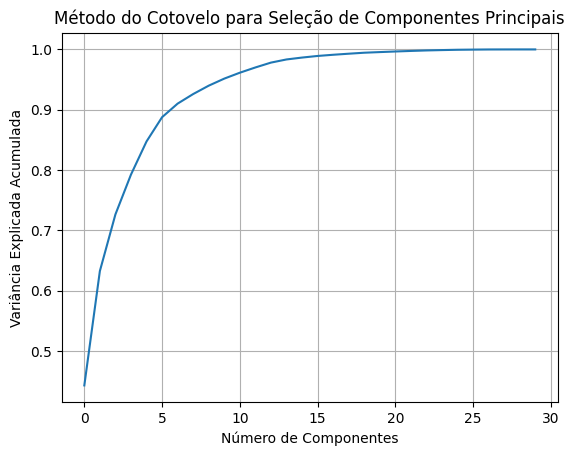

In [52]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(df[feature_columns])
explained_variance = pca.explained_variance_ratio_

plt.plot(np.cumsum(explained_variance))
plt.xlabel('Número de Componentes')
plt.ylabel('Variância Explicada Acumulada')
plt.title('Método do Cotovelo para Seleção de Componentes Principais')
plt.grid(True)
plt.show()

A partir de 5 componentes, o PCA consegue explicar aproximadamente 90% de variância. Para fins de comparação e análise da necessidade da quantidade de componentes ideal para se utilizar, serão utilizados 5, 10, 15 e 20 componentes, uma vez que estes componentes explicam cerca de 90% pra cima da variância. Utilizar mais de 20 componentes seria equivalente a utilizar 20, pois eles explicam praticamente a mesma quantidade da variância dos dados.

# Treinamento e Avaliação do Modelo

## Transformando coluna 'diagnosis' em binário

In [53]:
mapp = {'B':0,'M':1}
df['diagnosis_bin'] = df['diagnosis'].map(mapp)
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_bin
0,M,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,...,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015,1
1,M,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,...,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190,1
2,M,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,...,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391,1
3,M,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,...,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010,1
4,M,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,...,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,...,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091,1
565,M,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,...,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978,1
566,M,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,...,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409,1
567,M,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,...,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635,1


In [54]:
label_column = ['diagnosis_bin']

## Separação dos Dados em Treino e Teste

In [103]:
df_train, df_test = train_test_split(df[feature_columns+label_column], test_size=0.2, random_state=42)
df_train = df_train.reset_index().drop('index',axis=1)
df_test = df_test.reset_index().drop('index',axis=1)

df_train.head()

,fractal_dimension_mean,compactness_worst,concavity_worst,fractal_dimension_worst,fractal_dimension_se,concavity_mean,smoothness_worst,symmetry_worst,smoothness_mean,concavity_se,...,symmetry_mean,area_worst,concave points_mean,area_mean,texture_mean,compactness_mean,perimeter_mean,radius_mean,compactness_se,diagnosis_bin
0,2.503828,1.159269,4.700669,1.859432,2.180277,2.814833,0.693984,2.147190,0.728714,9.015603,...,1.093024,-0.977194,-0.133333,-1.150124,-0.456023,0.700428,-1.366651,-1.447987,3.385892,0
1,1.585220,3.207003,1.946890,2.463465,0.567413,2.007548,0.733436,1.936879,1.262455,0.226339,...,2.129892,2.124291,2.596960,1.866047,1.694187,3.389643,2.089619,1.977508,1.235822,1
2,0.968562,-0.550038,-0.635617,0.052877,0.766752,-0.363081,-1.490797,0.616770,-1.362838,0.372230,...,1.932741,-1.002860,-0.699511,-1.120545,-1.263516,-0.318972,-1.349763,-1.407089,0.776969,0
3,0.069801,-0.728158,-0.766109,-0.137199,-0.444787,-0.816190,0.768505,0.822228,0.014925,-0.699073,...,0.311723,-0.746907,-0.845247,-0.875668,1.380033,-0.606466,-0.986877,-0.987600,-0.845505,0
4,0.964310,-0.989865,-1.201820,-0.207578,0.816303,-0.978777,-0.213419,1.061659,1.212639,-0.803352,...,3.400421,-0.900022,-0.929077,-0.975496,-1.026155,-0.449737,-1.129395,-1.123927,-0.809735,0


In [56]:
df_test.head()

,fractal_dimension_mean,compactness_worst,concavity_worst,fractal_dimension_worst,fractal_dimension_se,concavity_mean,smoothness_worst,symmetry_worst,smoothness_mean,concavity_se,...,symmetry_mean,area_worst,concave points_mean,area_mean,texture_mean,compactness_mean,perimeter_mean,radius_mean,compactness_se,diagnosis_bin
204,0.132176,-0.104741,-0.024412,0.196958,-0.079018,-0.109847,0.448503,0.183204,0.234114,-0.161929,...,0.413949,-0.356299,-0.276232,-0.491999,-0.160486,0.027651,-0.448110,-0.470694,-0.355912,0
70,-1.160679,-0.131459,-0.016736,-1.000578,-0.793157,0.241064,-0.572873,-0.565828,-0.446227,-0.305168,...,-0.838325,1.732277,0.789060,1.351264,0.470149,-0.027309,1.302886,1.366877,-0.500666,1
131,-0.685782,-0.094562,0.512911,-0.208132,-0.504551,0.725686,0.974533,-0.103143,0.913744,-0.124794,...,0.435855,0.484159,0.824140,0.267377,0.044296,0.340350,0.400820,0.378508,-0.594561,1
431,1.165609,0.054930,-0.152986,0.534440,0.835972,-0.142993,0.553709,-0.557739,0.643316,0.554262,...,-0.002259,-0.641257,-0.539846,-0.532101,-0.374576,0.516599,-0.432457,-0.490575,0.417599,0
540,0.711976,-0.270137,-0.443716,-0.144403,0.649494,-0.269044,0.093432,-0.924975,0.247636,0.783709,...,0.023298,-0.743216,-0.592724,-0.716683,-1.128546,0.145150,-0.713374,-0.734828,0.874216,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
486,-1.310945,-0.300672,-0.136674,-0.996699,-0.974339,-0.463019,-0.796437,-0.721135,-0.708116,-0.460674,...,-1.469938,-0.087163,-0.541910,0.031601,-0.567723,-0.708046,0.092306,0.145616,-0.645420,0
75,-1.259911,-0.316575,0.051389,-1.112518,-0.698594,0.111622,0.772888,-0.405668,-0.333074,0.102995,...,-0.049721,0.601939,0.450385,0.463051,0.083856,-0.380943,0.499677,0.551757,-0.192715,1
249,-0.158433,-0.611108,-0.440357,-0.324505,-0.382376,-0.571494,0.286310,-0.383019,0.351537,-0.359545,...,0.260609,-0.683447,-0.506314,-0.707013,-1.014519,-0.497685,-0.745503,-0.740508,-0.737638,0
238,-0.213719,-0.074206,0.164131,-0.331709,-0.077883,0.269940,-1.063835,-1.635181,-1.005588,0.219045,...,-1.714551,-0.204943,-0.124821,-0.088136,1.992051,-0.008357,0.023930,0.026330,0.166096,0


## Criação, Treinamento e Avaliação dos Modelos

Os modelos serão treinados a partir do algoritmo SVM.

In [106]:
from sklearn import svm
from sklearn.metrics import classification_report

for pca_comp in [0,5,10,15,20]:
    if pca_comp != 0:
        temp_feature_columns = [f'PC{i+1}' for i in range(pca_comp)]
        pca = PCA(n_components=pca_comp)
        temp_df = pca.fit_transform(df_train[feature_columns])
        temp_df = pd.DataFrame(data=temp_df, columns=temp_feature_columns)
        temp_df[label_column] = df_train[label_column]

        temp_df_test = pca.transform(df_test[feature_columns])
        temp_df_test = pd.DataFrame(data=temp_df_test, columns=temp_feature_columns)
        temp_df_test[label_column] = df_test[label_column]  

    else:
        temp_df = df_train
        temp_df_test = df_test
        temp_feature_columns = feature_columns

    classf = svm.SVC(kernel='linear')
    classf.fit(temp_df[temp_feature_columns], temp_df[label_column].to_numpy().ravel())
    pred = classf.predict(temp_df_test[temp_feature_columns])
    # print(temp_df_test[label_column])
    results = classification_report(temp_df_test[label_column], pred)

    if pca_comp == 0:
        print(f'Resultados com dados originais:\n')
    else:
        print(f'Resultados com dados reduzidos para {pca_comp} componentes:\n ')
    print(results)

Resultados com dados originais:

              precision    recall  f1-score   support

           0       0.97      0.96      0.96        71
           1       0.93      0.95      0.94        43

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114

Resultados com dados reduzidos para 5 componentes:
 
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        71
           1       0.98      0.98      0.98        43

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

Resultados com dados reduzidos para 10 componentes:
 
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        71
           1       0.98      0.98      0.98        43

    accuracy                           0.9

O melhor resultado foi obtido ao reduzir a dimensionalidade dos dados para 15 componentes, ou seja, mesmo utilizando metade das features originais, o modelo conseguiu obter um resultado superior ao modelo treinado com os dados originais. Todas as aplicações de redução de dimensionalidade utilizando PCA proveram um melhor resultado do que utilizando apenas os dados originais. Vale ressaltar que utilizar 5 componentes já é suficiente para conseguir ótimos resultados.